Q1 Path velocity and Accelaration of end effector

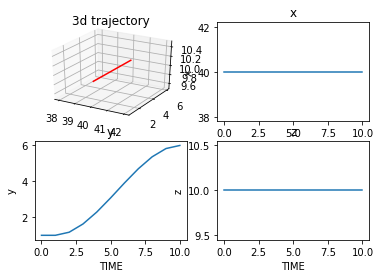

In [ ]:
import numpy as np
import scipy
from matplotlib import animation,pyplot as plt
ini=np.array([40,1,10])
f=np.array([0,5,0])
tf=9
ax0=ini[0]
ay0=ini[1]
az0=ini[2]
ax1=0
ay1=0
az1=0

A=np.array([[tf**2,tf**3,0,0,0,0],[0,0,tf**2,tf**3,0,0],[0,0,0,0,tf**2,tf**3],[2*tf,3*tf**2,0,0,0,0],[0,0,2*tf,3*tf**2,0,0],[0,0,0,0,2*tf,3*tf**2]])
K=np.array([f[0],f[1],f[2],0,0,0])
invA=np.linalg.inv(A)
X=invA@K

ax2=X[0]
ax3=X[1]
ay2=X[2]
ay3=X[3]
az2=X[4]
az3=X[5]
Aa=np.array([[ax0,ax1,ax2,ax3],[ay0,ay1,ay2,ay3],[az0,az1,az2,az3]])
arr = np.array([[40,1,10]])

#PATH calculator
def pathfunc(tf,Aa,arr):
  t=0
  for t in range (tf+1):
    T=np.array([1,t,t**2,t**3])
    
    
    row=Aa@T
    
    arr = np.vstack([arr,row])

  return arr

arr = np.array([[40,1,10]])
arr1 =pathfunc(tf,Aa,arr) #here we get all the points of trajectory

#Velocity calculation
Aa=np.array([[ax1,2*ax2,3*ax3],[ay1,2*ay2,3*ay3],[az1,2*az2,3*az3]])
arr = np.array([[0,0,0]])

#PATH calculator
def pathfunc(tf,Aa,arr):
  t=0
  for t in range (tf+1):
    T=np.array([1,t,t**2])
    
    
    row=Aa@T
    
    arr = np.vstack([arr,row])

  return arr

arr2 = np.array([[0,0,0]])
arr21 =pathfunc(tf,Aa,arr2) #here we get all the points of trajectory

#Accelation calculation
Aa=np.array([[2*ax2,6*ax3],[2*ay2,6*ay3],[2*az2,6*az3]])
arr = np.array([[0,0,0]])

#PATH calculator
def pathfunc(tf,Aa,arr):
  t=0
  for t in range (tf+1):
    T=np.array([1,t])
    
    
    row=Aa@T
    
    arr = np.vstack([arr,row])

  return arr

arr3 = np.array([[0,0,0]])
arr31 =pathfunc(tf,Aa,arr3) #here we get all the points of trajectory



fig=plt.figure()
ax=fig.add_subplot(2,2,1,projection='3d')
X=[[s[0] for s in arr1 ],[s[1] for s in arr1 ],[s[2] for s in arr1 ]]
ax.plot3D(X[0],X[1],X[2],'r')
ax.set_title('3d trajectory')

title=['x','y','z']
t=[s for s in range(len(X[0]))]
for i in range(3):
  ax=fig.add_subplot(2,2,i+2)
  ax.plot(t,X[i])
  ax.set_ylabel(title[i])
  ax.set_xlabel('TIME')
  ax.set_title(title[i])

plt.show()

**The 3D is the xyz PLOT and others are X,y,z vs t plot respectively**

**Velocity of end effector**

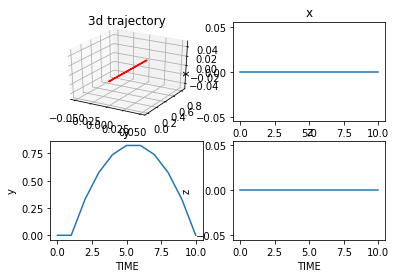

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(2,2,1,projection='3d')
X=[[s[0] for s in arr21 ],[s[1] for s in arr21 ],[s[2] for s in arr21 ]]
ax.plot3D(X[0],X[1],X[2],'r')
ax.set_title('3d trajectory')

title=['x','y','z']
t=[s for s in range(len(X[0]))]
for i in range(3):
  ax=fig.add_subplot(2,2,i+2)
  ax.plot(t,X[i])
  ax.set_ylabel(title[i])
  ax.set_xlabel('TIME')
  ax.set_title(title[i])

plt.show()

**Accelaration of end effector**

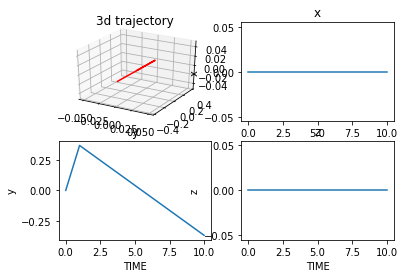

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(2,2,1,projection='3d')
X=[[s[0] for s in arr31 ],[s[1] for s in arr31 ],[s[2] for s in arr31 ]]
ax.plot3D(X[0],X[1],X[2],'r')
ax.set_title('3d trajectory')

title=['x','y','z']
t=[s for s in range(len(X[0]))]
for i in range(3):
  ax=fig.add_subplot(2,2,i+2)
  ax.plot(t,X[i])
  ax.set_ylabel(title[i])
  ax.set_xlabel('TIME')
  ax.set_title(title[i])

plt.show()

In [ ]:
#JACOBIAN TO calculate jooint Angular velocity and accelaration
J=sym.Matrix([[-l1*sym.sin(q1) - l2*sym.sin(q1 + q2), -l2*sym.sin(q1 + q2), 0],
       [l1*sym.cos(q1) + l2*sym.cos(q1 + q2), l2*sym.cos(q1 + q2), 0],
       [0, 0, -1]])
#to calculate jont angular velocity Qdot
#Endeffector velocity

v=arr21
a=arr31
Q1=np.array([ 0., -0.1637459 ,  0.6424904 ,  0.65874639,  0.63623502,
        0.47257178,  0.73894073,  0.60972479,  0.60245313,  0.60116773])
Q2=np.array([0., 0.67474094, 0.5843739 , 0.51530277, 0.61126651,
       1.48927457, 0.18623433, 0.72758217, 0.76026321, 0.76608005])
D4=np.array([ 0.,2.,1.,  0.83381924,  0.40524781,
       -0.18075802, -0.81924198, -1.40524781, -1.83381924, -2.        ])

arrqd=np.array([[0,0,0]])
for i in range(9):
  Qdt=J.inv()
  Qdt1= Qdt.subs({l1:25,l2:25,q1:Q1[i],q2:Q2[i],l3:D4[i]})
  arrqd=np.vstack([arrqd,np.transpose(Qdt1@np.transpose(v[i]))])
Q1dotd=np.array([0,0, 0, 0.0358215290870788, 0.0654788227547772,
       0.0693626090443080, 0.0389425507384284, 0.150917162122362,
       0.0307062094949028, -7.88169758329245e-18])
Q2dotd=np.array([0,0, 0, -0.0586206785486850, -0.108935723448079,
       -0.112827640080910, -0.0581157271986030, -0.278174186647171,
       -0.0487803117815569, 1.24464477104088e-17])

D4dotd=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
#Joint accelaration calculator
Jdot=sym.Matrix([[-l1*sym.cos(q1)*q1dot- l2*sym.cos(q1 + q2)*(q1dot+q2dot), -l2*sym.cos(q1 + q2)*(q1dot+q2dot), 0],
       [-l1*sym.sin(q1)*q1dot - l2*sym.sin(q1 + q2)*(q1dot+q2dot), -l2*sym.sin(q1 + q2)*(q1dot+q2dot), 0],
       [0, 0, 1]])
arrqd1=np.array([[0,0,0]])
for i in range(9):
  Qddt=Jdot.inv()
  Qddt1= Qdt.subs({l1:25,l2:25,q1:Q1[i],q2:Q2[i],l3:D4[i],q1dot:Q1dotd[i],q2dot:Q1dotd[i]})
  arrqd1=np.vstack([arrqd1,np.transpose(Qddt1@np.transpose(a[i]))])
Q1ddotd=np.array([0, 0, 0, 0.0358215290870788, 0.0654788227547772,
       0.0693626090443080, 0.0389425507384284, 0.150917162122362,
       0.0307062094949028, -7.88169758329245e-18])
Q2ddotd=np.array([0, 0, 0, -0.0586206785486850, -0.108935723448079,
       -0.112827640080910, -0.0581157271986030, -0.278174186647171,
       -0.0487803117815569, 1.24464477104088e-17])
D4ddotd=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
D4dotd

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

**JOINT angle TRAJECTORY PLOT AFTER INVERSE KINEMATICS SCARA**

**JOINT TRAJECTORIES IN XYZ COORDINATE**

[[-0.39592176  0.95696939 15.        ]
 [-0.39592176  0.95696939 15.        ]
 [-0.39144246  0.95651383 15.        ]
 [-0.37929065  0.95493702 15.        ]
 [-0.36132114  0.9517325  15.        ]
 [-0.33944651  0.94651104 15.        ]
 [-0.31576889  0.93933261 15.        ]
 [-0.29263995  0.93088436 15.        ]
 [-0.27265728  0.92250391 15.        ]
 [-0.25860043  0.91603268 15.        ]
 [-0.2533018   0.91347314 15.        ]]


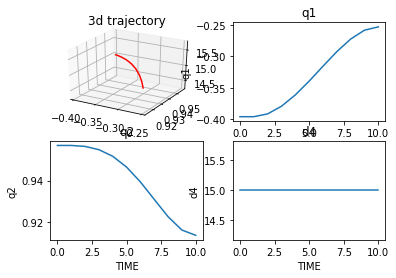

In [41]:
#inverse kinematics

def invkine(arr1,J):
  Q=[]
  for i in range(len(arr1)):
    x=[0]*3;
    x=arr1[i];
    offset=25;
    d1=25;
    d2=25-0.2*25;#length change in calculated inverse kine
    r = abs((x[0]**2+x[1]**2-d1**2-d2**2)/(2*d1*d2))
    theta2 = np.arctan2(np.sqrt(abs(1-r**2)),r)
    theta1 = np.arctan2(x[1],x[0]) - np.arctan2((d2*np.sin(theta2)),(d1+d2*np.cos(theta2)))
    d3 =offset-x[2]
    Q.append([theta1,theta2,d3])
    # J=np.vstack([J,s])
  
  return np.array(Q)

    
J=np.array([[0,0,0]])
arr2=invkine(arr1,J) #here we get all the JOINT VAR of trajectory
print(arr2)

fig=plt.figure()
ax=fig.add_subplot(2,2,1,projection='3d')
X=[[s[0] for s in arr2 ],[s[1] for s in arr2 ],[s[2] for s in arr2 ]]
ax.plot3D(X[0],X[1],X[2],'r')

ax.set_title('3d trajectory')

title=['q1','q2','d4']
t=[s for s in range(len(X[0]))]
for i in range(3):
  ax=fig.add_subplot(2,2,i+2)
  ax.plot(t,X[i])
  ax.set_ylabel(title[i])
  ax.set_xlabel('TIME')
  ax.set_title(title[i])

plt.show()

**The 3D is the Q1,Q2,D4 PLOT and others are Q1,Q2,D4 vs t plot respectively**

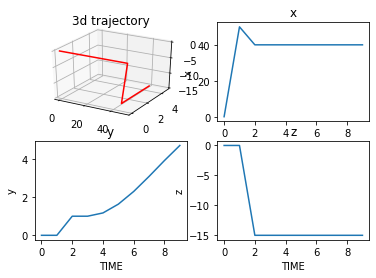

In [ ]:



import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

Q1=arr2[:,0]
Q2=arr2[:,1]
D4=arr2[:,2]


sym.init_printing()
q1, q2, q3,q1dot,q2dot,q3dot,q1ddot,q2ddot,q3ddot,T1,T2,F,mG,l1,l2,l3 = sym.symbols('q1 q2 q3 q1dot q2dot d4dot q1ddot q2ddot d4ddot T1 T2 F mG l1 l2 l3')

A1=sym.Matrix([[sym.cos(q1),-sym.sin(q1),0,l1*sym.cos(q1)],[sym.sin(q1),sym.cos(q1),0,l1*sym.sin(q1)],[0,0,1,0],[0,0,0,1]]);

A2=sym.Matrix([[sym.cos(q2),sym.sin(q2),0,l2*sym.cos(q2)],[sym.sin(q2),-sym.cos(q2),0,l2*sym.sin(q2)],[0,0,-1,0],[0,0,0,1]]);
A3=sym.Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,l3],[0,0,0,1]]);

Q1x=sym.simplify(A1*A2*A3)
Q2x=sym.simplify(A1*A2)
Q3x=sym.simplify(A1)
#FORWARD KINEMATICS END EFFECTOR OR LAST JOINT
def pathfunc12(Q1n,Q2n,D4n,arr):
  t=0
  for t in range (9):
    FA=Q1x.subs({l1:25,l2:25,q1:Q1n[t],q2:Q2n[t],l3:D4[t]})
    rowq=np.transpose(FA[:,3])
  
    arr = np.vstack([arr,rowq])

  return arr


arr313 = np.array([[0,0,0,0]])
arr3131 =np.delete(pathfunc12(Q1,Q2,D4,arr313),3,1)
fig=plt.figure()
ax=fig.add_subplot(2,2,1,projection='3d')
X=[[s[0] for s in arr3131 ],[s[1] for s in arr3131 ],[s[2] for s in arr3131 ]]
ax.plot3D(X[0],X[1],X[2],'r')

ax.set_title('3d trajectory')

title=['x','y','z']
t=[s for s in range(len(X[0]))]
for i in range(3):
  ax=fig.add_subplot(2,2,i+2)
  ax.plot(t,X[i])
  ax.set_ylabel(title[i])
  ax.set_xlabel('TIME')
  ax.set_title(title[i])

plt.show()



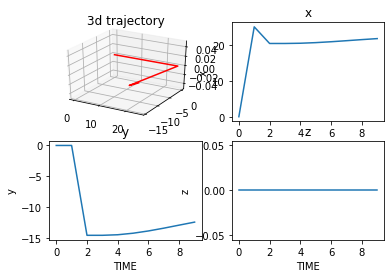

In [ ]:
#FORWARD KINEMATICS END EFFECTOR OR REVOLUTE JOINT 1

def pathfunc14(Q1,Q2,D4,arr):
  t=0
  for t in range (9):
    FA=Q3x.subs({l1:25,l2:25,q1:Q1[t],q2:Q2[t],l3:D4[t]})
    rowq=np.transpose(FA[:,3])
  
    arr = np.vstack([arr,rowq])

  return arr

arr3134 =np.delete(pathfunc14(Q1,Q2,D4,arr313),3,1)
fig=plt.figure()
ax=fig.add_subplot(2,2,1,projection='3d')
X=[[s[0] for s in arr3134 ],[s[1] for s in arr3134 ],[s[2] for s in arr3134 ]]
ax.plot3D(X[0],X[1],X[2],'r')

ax.set_title('3d trajectory')

title=['x','y','z']
t=[s for s in range(len(X[0]))]
for i in range(3):
  ax=fig.add_subplot(2,2,i+2)
  ax.plot(t,X[i])
  ax.set_ylabel(title[i])
  ax.set_xlabel('TIME')
  ax.set_title(title[i])

plt.show()


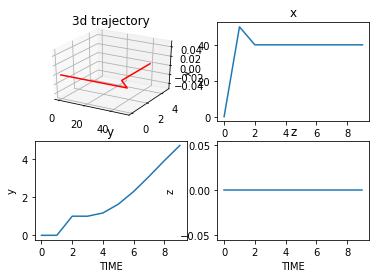

In [ ]:
#FORWARD KINEMATICS END EFFECTOR OR REVOLUTE JOINT 2
def pathfunc13(Q1n,Q2n,D4n,arr):
  t=0
  for t in range (9):
    FA=Q2x.subs({l1:25,l2:25,q1:Q1n[t],q2:Q2n[t],l3:D4n[t]})
    rowq=np.transpose(FA[:,3])
  
    arr = np.vstack([arr,rowq])

  return arr

arr3132 =np.delete(pathfunc13(Q1,Q2,D4,arr313),3,1)
fig=plt.figure()
ax=fig.add_subplot(2,2,1,projection='3d')
X=[[s[0] for s in arr3132 ],[s[1] for s in arr3132 ],[s[2] for s in arr3132 ]]
ax.plot3D(X[0],X[1],X[2],'r')

ax.set_title('3d trajectory')

title=['x','y','z']
t=[s for s in range(len(X[0]))]
for i in range(3):
  ax=fig.add_subplot(2,2,i+2)
  ax.plot(t,X[i])
  ax.set_ylabel(title[i])
  ax.set_xlabel('TIME')
  ax.set_title(title[i])

plt.show()


In [ ]:

Q1

array([ 0.        , -0.6180896 , -0.6180896 , -0.61090818, -0.59210791,
       -0.56576435, -0.53625107, -0.50844485, -0.48768617, -0.47954266])

**Scara DYNAMICS WITH PD**

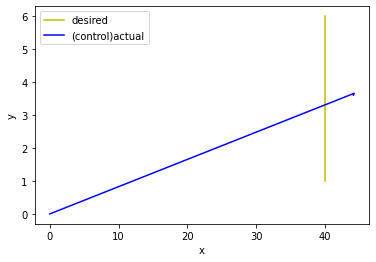

In [42]:
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import math
import numpy as np
import matplotlib.pyplot as plt
'''def model(z,t):
  dq1dt=sym.diff(q1)
  dq2dt=sym.diff(q2)
  dzdt=sym.diff(d4)
  dq1ddt=r[0]
  dq2ddt=r[1]
  dzddt=r[2]
  dzdt=[dq1dt,dq2dt,dzdt,dq1ddt,dq2ddt,dzddt]
  return dzdt

z0 = [0,0]
t=np.linspace(0,5)
z=odeint(model,z0,t)'''
E1=[]
E2=[]
E3=[]
T=[]
Q1=arr2[:,0]
Q2=arr2[:,1]
D4=arr2[:,2]
Q1ddotd=np.array([0, 0, 0, 0.0358215290870788, 0.0654788227547772,0.0693626090443080, 0.0389425507384284, 0.150917162122362,0.0307062094949028, -7.88169758329245e-18])
Q2ddotd=np.array([0, 0, 0, -0.0586206785486850, -0.108935723448079,-0.112827640080910, -0.0581157271986030, -0.278174186647171,-0.0487803117815569, 1.24464477104088e-17])
Q1dotd=np.array([0,0, 0, 0.0358215290870788, 0.0654788227547772,0.0693626090443080, 0.0389425507384284, 0.150917162122362,0.0307062094949028, -7.88169758329245e-18])
Q2dotd=np.array([0,0, 0, -0.0586206785486850, -0.108935723448079,-0.112827640080910, -0.0581157271986030, -0.278174186647171,-0.0487803117815569, 1.24464477104088e-17])
D4ddotd=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
D4dotd=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])



def Model(t, y):

  KP1=10
  KI1=0
  KD1=5
  KP2=3.0
  KI2=0
  KD2=1.25
  KP3=1
  KI3=0
  KD3=1
  q1=y[0]
  q2=y[1]
  d4=y[2]
  q1dot=y[3]
  q2dot=y[4]
  d4dot=y[5]
  dq1dt=q1dot
  dq2dt=q2dot
  dzdt=d4dot
    
  T.append(t)
   
  n=round(t)
  if(t<=n+1):
    e1=(Q1[n-1]-q1)
    e1d=Q1ddotd[n-1]  
    e2=(Q2[n-1]-q2)
    e2d=Q2ddotd[n-1]
    e3=(D4[n-1]-d4)
    e3d=D4ddotd[n-1]
  else:
    n=n+1
    e1=(Q1[n]-q1)
    e1d=Q1ddotd[n]  
    e2=(Q2[n]-q2)
    e2d=Q2ddotd[n]
    e3=(D4[n]-d4)
    e3d=D4ddotd[n]
   
  E1.append(e1)
  E2.append(e2)
  E3.append(e3)
  
  s1=0
  s2=0
  s3=0
  s11=0
  s22=0
  s33=0
  imp=0;
  if n>6 and n<=7:
    imp=1000;
  if(t>2):
      for i in range(7):
          s1=s1+ (E1[-(1+i)])*(T[-(1+i)]-T[-(2+i)])
          s2=s2+ (E2[-(1+i)])*(T[-(1+i)]-T[-(2+i)])
          s3=s3+ (E3[-(1+i)])*(T[-(1+i)]-T[-(2+i)])
    #Differentiator part
  if(t>2 and (T[-(1+n)]-T[-(2+n)])>0):
      s11=(E1[-(1+n)]-E1[-(2+n)])/(T[-(1+n)]-T[-(2+n)])
      s22=(E2[-(1+n)]-E2[-(2+n)])/(T[-(1+n)]-T[-(2+n)])
      s33=(E3[-(1+n)]-E3[-(2+n)])/(T[-(1+n)]-T[-(2+n)])
  

  T1=KP1*(e1)+KI1*(s1)+KD1*(Q1dotd[n]-q1dot)+imp*0
  T2=KP2*(e2)+KI2*(s2)+KD2*(Q2dotd[n]-q2dot)+imp*0
  F=KP3*(e3)+KI3*(s3)+KD3*(D4dotd[n]-d4dot)+imp*0

  

    
    #dq1ddt=(360*q1dot*q2dot*np.sin(q2)+360*q2dot*(q1dot+q2dot)*np.sin(q2)-(-6*q1dot**2*np.sin(q2)+3)*(72*np.cos(q2)+60)+240)/(432*np.cos(q2)**2-540)
  dq1ddt=(-(T2 - 2812.5*q1dot**2*math.sin(q2))*(15820312.5*math.cos(q2)**2 + 43945312.5*math.cos(q2) + 30322265.625) + (T1 + 2812.5*q1dot*q2dot*math.sin(q2) + 2812.5*q2dot*(q1dot + q2dot)*math.sin(q2))*(-9.31322574615479e-10*math.cos(q2)**2 + 20214843.75*math.cos(q2) + 30322265.625))/(44494628906.25*math.cos(q2)**3 + 66741943359.375*math.cos(q2)**2 - 97915649414.0625*math.cos(q2) - 146873474121.094)
    #dq2ddt=((-6*q1dot**2*np.sin(q2)+3)*(12*np.cos(q2)+14)-(6*np.cos(q2)+5)*(6*q1dot*q2dot*np.sin(q2)+6*q2dot*(q1dot+q2dot)*np.sin(q2)+4))/(36*np.cos(q2)**2-45)
  dq2ddt=((T2 - 2812.5*q1dot**2*math.sin(q2))*(5625.0*math.cos(q2) + 8437.5) - (2812.5*math.cos(q2) + 3593.75)*(T1 + 2812.5*q1dot*q2dot*math.sin(q2) + 2812.5*q2dot*(q1dot + q2dot)*math.sin(q2)))/(7910156.25*math.cos(q2)**2 - 17407226.5625)
  dzddt= 9.8- 1/3*F
    
  dydt = [dq1dt,dq2dt,dzdt,dq1ddt,dq2ddt,dzddt]
  return dydt



initstate = np.array([Q1[0],Q2[0],D4[0],0,0,0]) # initial states
timestep = 1

time=np.linspace(0,9,9) # define the time for which we want to solve


# solve the ODE. solve_ivp is the most recent version of the solver. Check docs for more information on how to use.
solution = solve_ivp(Model,[0, time[-1]], initstate, t_eval= time) 
Q1n=solution.y[0]
Q2n=solution.y[1]
D4n=solution.y[2]
Q1DOT=solution.y[3]
Q2DOT=solution.y[4]
D4DOT=solution.y[5]

sym.init_printing()
q1, q2, q3,q1dot,q2dot,q3dot,q1ddot,q2ddot,q3ddot,T1,T2,F,mG,l1,l2,l3 = sym.symbols('q1 q2 q3 q1dot q2dot d4dot q1ddot q2ddot d4ddot T1 T2 F mG l1 l2 l3')

A1=sym.Matrix([[sym.cos(q1),-sym.sin(q1),0,l1*sym.cos(q1)],[sym.sin(q1),sym.cos(q1),0,l1*sym.sin(q1)],[0,0,1,0],[0,0,0,1]]);

A2=sym.Matrix([[sym.cos(q2),sym.sin(q2),0,l2*sym.cos(q2)],[sym.sin(q2),-sym.cos(q2),0,l2*sym.sin(q2)],[0,0,-1,0],[0,0,0,1]]);
A3=sym.Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,l3],[0,0,0,1]]);

Q1x=sym.simplify(A1*A2*A3)
Q2x=sym.simplify(A1*A2)
Q3x=sym.simplify(A1)
#FORWARD KINEMATICS
def pathfunc12(Q1n,Q2n,D4n,arr):
  t=0
  for t in range (9):
    FA=Q1x.subs({l1:25,l2:25,q1:Q1n[t],q2:Q2n[t],l3:D4n[t]})
    rowq=np.transpose(FA[:,3])
  
    arr = np.vstack([arr,rowq])

  return arr



arr313 = np.array([[0,0,0,0]])
arr3131 =np.delete(pathfunc12(Q1n,Q2n,D4n,arr313),3,1)
def pathfunc13(Q1n,Q2n,D4n,arr):
  t=0
  for t in range (9):
    FA=Q2x.subs({l1:25,l2:25,q1:Q1n[t],q2:Q2n[t],l3:D4n[t]})
    rowq=np.transpose(FA[:,3])
  
    arr = np.vstack([arr,rowq])

  return arr

arr3132 =np.delete(pathfunc13(Q1n,Q2n,D4n,arr313),3,1)
def pathfunc14(Q1n,Q2n,D4n,arr):
  t=0
  for t in range (9):
    FA=Q3x.subs({l1:25,l2:25,q1:Q1n[t],q2:Q2n[t],l3:D4n[t]})
    rowq=np.transpose(FA[:,3])
  
    arr = np.vstack([arr,rowq])

  return arr

arr3134 =np.delete(pathfunc14(Q1n,Q2n,D4n,arr313),3,1)
#END EFFECTOR PLOT
plt.show()
plt.plot(arr1[:,0],arr1[:,1],'y')
plt.plot(arr3131[:,0],arr3131[:,1],'b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(["desired", "(control)actual"], loc ="upper left")





**with length change up**



```
# This is formatted as code
```

** without length change below**

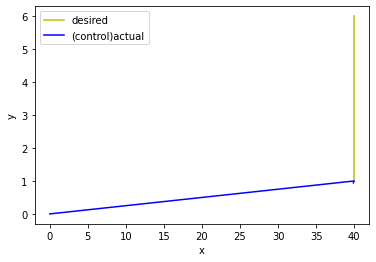

In [36]:
plt.show()
plt.plot(arr1[:,0],arr1[:,1],'y')
plt.plot(arr3131[:,0],arr3131[:,1],'b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(["desired", "(control)actual"], loc ="upper left")

PD CONTROL WITH FEED FORWARD ADDITION

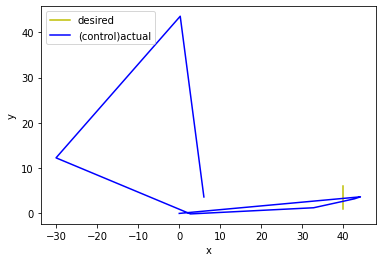

In [43]:
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import math
import numpy as np
import matplotlib.pyplot as plt
'''def model(z,t):
  dq1dt=sym.diff(q1)
  dq2dt=sym.diff(q2)
  dzdt=sym.diff(d4)
  dq1ddt=r[0]
  dq2ddt=r[1]
  dzddt=r[2]
  dzdt=[dq1dt,dq2dt,dzdt,dq1ddt,dq2ddt,dzddt]
  return dzdt

z0 = [0,0]
t=np.linspace(0,5)
z=odeint(model,z0,t)'''
E1=[]
E2=[]
E3=[]
T=[]
Q1=arr2[:,0]
Q2=arr2[:,1]
D4=arr2[:,2]
Q1ddotd=np.array([0, 0, 0, 0.0358215290870788, 0.0654788227547772,0.0693626090443080, 0.0389425507384284, 0.150917162122362,0.0307062094949028, -7.88169758329245e-18])
Q2ddotd=np.array([0, 0, 0, -0.0586206785486850, -0.108935723448079,-0.112827640080910, -0.0581157271986030, -0.278174186647171,-0.0487803117815569, 1.24464477104088e-17])
Q1dotd=np.array([0,0, 0, 0.0358215290870788, 0.0654788227547772,0.0693626090443080, 0.0389425507384284, 0.150917162122362,0.0307062094949028, -7.88169758329245e-18])
Q2dotd=np.array([0,0, 0, -0.0586206785486850, -0.108935723448079,-0.112827640080910, -0.0581157271986030, -0.278174186647171,-0.0487803117815569, 1.24464477104088e-17])
D4ddotd=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
D4dotd=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


def Model(t, y):

  KP1=10
  KI1=0
  KD1=5
  KP2=3.0
  KI2=0
  KD2=1.25
  KP3=1
  KI3=0
  KD3=1
  q1=y[0]
  q2=y[1]
  d4=y[2]
  q1dot=y[3]
  q2dot=y[4]
  d4dot=y[5]
  dq1dt=q1dot
  dq2dt=q2dot
  dzdt=d4dot
    
  T.append(t)
   
  n=round(t)
  if(t<=n+1):
    e1=(Q1[n-1]-q1)
    e1d=Q1ddotd[n-1]  
    e2=(Q2[n-1]-q2)
    e2d=Q2ddotd[n-1]
    e3=(D4[n-1]-d4)
    e3d=D4ddotd[n-1]
  else:
    n=n+1
    e1=(Q1[n]-q1)
    e1d=Q1ddotd[n]  
    e2=(Q2[n]-q2)
    e2d=Q2ddotd[n]
    e3=(D4[n]-d4)
    e3d=D4ddotd[n]
   
  E1.append(e1)
  E2.append(e2)
  E3.append(e3)
  
  s1=0
  s2=0
  s3=0
  s11=0
  s22=0
  s33=0

  if(t>2):
      for i in range(7):
          s1=s1+ (E1[-(1+i)])*(T[-(1+i)]-T[-(2+i)])
          s2=s2+ (E2[-(1+i)])*(T[-(1+i)]-T[-(2+i)])
          s3=s3+ (E3[-(1+i)])*(T[-(1+i)]-T[-(2+i)])
    #Differentiator part
  if(t>2 and (T[-(1+n)]-T[-(2+n)])>0):
      s11=(E1[-(1+n)]-E1[-(2+n)])/(T[-(1+n)]-T[-(2+n)])
      s22=(E2[-(1+n)]-E2[-(2+n)])/(T[-(1+n)]-T[-(2+n)])
      s33=(E3[-(1+n)]-E3[-(2+n)])/(T[-(1+n)]-T[-(2+n)])
  imp=0
  if n>6 and n<=7:
    imp=1000;

  #T1=KP1*(e1)+KI1*(s1)+KD1*s11+0*e1d
  #T2=KP2*(e2)+KI2*(s2)+KD2*s22
  #F=KP3*(e3)+KI3*(s3)+KD3*s33
   #Jeff
  j1=5625.0*math.cos(Q2[n]) + 8447.5
  j2=3603.75000000000
  j3=13
  #Beff
  Beff=11


  T1=KP1*(e1)+KI1*(s1)+KD1*s11+(j1)*Q1ddotd[n]+Beff*Q1dotd[n]+imp*0
    #print(T1)
  T2=KP2*(e2)+KI2*(s2)+KD2*s22+j2*Q2ddotd[n]+Beff*Q2dotd[n]+imp*0
  F=KP3*(e3)+KI3*(s3)+KD3*s33+j3*D4ddotd[n]+Beff*D4dotd[n]+imp*0
  

    
    #dq1ddt=(360*q1dot*q2dot*np.sin(q2)+360*q2dot*(q1dot+q2dot)*np.sin(q2)-(-6*q1dot**2*np.sin(q2)+3)*(72*np.cos(q2)+60)+240)/(432*np.cos(q2)**2-540)
  dq1ddt=(-(T2 - 2812.5*q1dot**2*math.sin(q2))*(15820312.5*math.cos(q2)**2 + 43945312.5*math.cos(q2) + 30322265.625) + (T1 + 2812.5*q1dot*q2dot*math.sin(q2) + 2812.5*q2dot*(q1dot + q2dot)*math.sin(q2))*(-9.31322574615479e-10*math.cos(q2)**2 + 20214843.75*math.cos(q2) + 30322265.625))/(44494628906.25*math.cos(q2)**3 + 66741943359.375*math.cos(q2)**2 - 97915649414.0625*math.cos(q2) - 146873474121.094)
    #dq2ddt=((-6*q1dot**2*np.sin(q2)+3)*(12*np.cos(q2)+14)-(6*np.cos(q2)+5)*(6*q1dot*q2dot*np.sin(q2)+6*q2dot*(q1dot+q2dot)*np.sin(q2)+4))/(36*np.cos(q2)**2-45)
  dq2ddt=((T2 - 2812.5*q1dot**2*math.sin(q2))*(5625.0*math.cos(q2) + 8437.5) - (2812.5*math.cos(q2) + 3593.75)*(T1 + 2812.5*q1dot*q2dot*math.sin(q2) + 2812.5*q2dot*(q1dot + q2dot)*math.sin(q2)))/(7910156.25*math.cos(q2)**2 - 17407226.5625)
  dzddt= 9.8- 1/3*F
    
  dydt = [dq1dt,dq2dt,dzdt,dq1ddt,dq2ddt,dzddt]
  return dydt



initstate = np.array([Q1[0],Q2[0],D4[0],0,0,0]) # initial states
timestep = 1

time=np.linspace(0,9,9) # define the time for which we want to solve


# solve the ODE. solve_ivp is the most recent version of the solver. Check docs for more information on how to use.
solution = solve_ivp(Model,[0, time[-1]], initstate, t_eval= time) 
Q1n=solution.y[0]
Q2n=solution.y[1]
D4n=solution.y[2]
Q1DOT=solution.y[3]
Q2DOT=solution.y[4]
D4DOT=solution.y[5]
sym.init_printing()
q1, q2, q3,q1dot,q2dot,q3dot,q1ddot,q2ddot,q3ddot,T1,T2,F,mG,l1,l2,l3 = sym.symbols('q1 q2 q3 q1dot q2dot d4dot q1ddot q2ddot d4ddot T1 T2 F mG l1 l2 l3')

A1=sym.Matrix([[sym.cos(q1),-sym.sin(q1),0,l1*sym.cos(q1)],[sym.sin(q1),sym.cos(q1),0,l1*sym.sin(q1)],[0,0,1,0],[0,0,0,1]]);

A2=sym.Matrix([[sym.cos(q2),sym.sin(q2),0,l2*sym.cos(q2)],[sym.sin(q2),-sym.cos(q2),0,l2*sym.sin(q2)],[0,0,-1,0],[0,0,0,1]]);
A3=sym.Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,l3],[0,0,0,1]]);

Q1x=sym.simplify(A1*A2*A3)
Q2x=sym.simplify(A1*A2)
Q3x=sym.simplify(A1)
#FORWARD KINEMATICS
def pathfunc12(Q1n,Q2n,D4n,arr):
  t=0
  for t in range (9):
    FA=Q1x.subs({l1:25,l2:25,q1:Q1n[t],q2:Q2n[t],l3:D4n[t]})
    rowq=np.transpose(FA[:,3])
  
    arr = np.vstack([arr,rowq])

  return arr



arr313 = np.array([[0,0,0,0]])
arr3131 =np.delete(pathfunc12(Q1n,Q2n,D4n,arr313),3,1)
def pathfunc13(Q1n,Q2n,D4n,arr):
  t=0
  for t in range (9):
    FA=Q2x.subs({l1:25,l2:25,q1:Q1n[t],q2:Q2n[t],l3:D4n[t]})
    rowq=np.transpose(FA[:,3])
  
    arr = np.vstack([arr,rowq])

  return arr

arr3132 =np.delete(pathfunc13(Q1n,Q2n,D4n,arr313),3,1)
def pathfunc14(Q1n,Q2n,D4n,arr):
  t=0
  for t in range (9):
    FA=Q3x.subs({l1:25,l2:25,q1:Q1n[t],q2:Q2n[t],l3:D4n[t]})
    rowq=np.transpose(FA[:,3])
  
    arr = np.vstack([arr,rowq])

  return arr

arr3134 =np.delete(pathfunc14(Q1n,Q2n,D4n,arr313),3,1)
#END EFFECTOR PLOT
plt.show()
plt.plot(arr1[:,0],arr1[:,1],'y')
plt.plot(arr3131[:,0],arr3131[:,1],'b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(["desired", "(control)actual"], loc ="upper left")





**with length change up**

**without length changebelow**

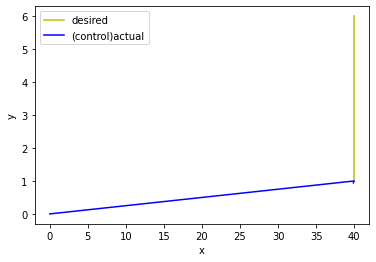

In [37]:
plt.show()
plt.plot(arr1[:,0],arr1[:,1],'y')
plt.plot(arr3131[:,0],arr3131[:,1],'b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(["desired", "(control)actual"], loc ="upper left")

**PD  control along with a feed  forward disturbance cancellation using computed torque method**

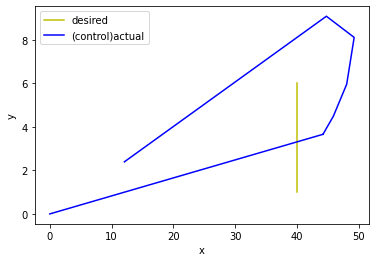

In [44]:
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import math
import numpy as np
import matplotlib.pyplot as plt
'''def model(z,t):
  dq1dt=sym.diff(q1)
  dq2dt=sym.diff(q2)
  dzdt=sym.diff(d4)
  dq1ddt=r[0]
  dq2ddt=r[1]
  dzddt=r[2]
  dzdt=[dq1dt,dq2dt,dzdt,dq1ddt,dq2ddt,dzddt]
  return dzdt

z0 = [0,0]
t=np.linspace(0,5)
z=odeint(model,z0,t)'''
E1=[]
E2=[]
E3=[]
T=[]
Q1=arr2[:,0]
Q2=arr2[:,1]
D4=arr2[:,2]
Q1ddotd=np.array([0, 0, 0, 0.0358215290870788, 0.0654788227547772,0.0693626090443080, 0.0389425507384284, 0.150917162122362,0.0307062094949028, -7.88169758329245e-18])
Q2ddotd=np.array([0, 0, 0, -0.0586206785486850, -0.108935723448079,-0.112827640080910, -0.0581157271986030, -0.278174186647171,-0.0487803117815569, 1.24464477104088e-17])
Q1dotd=np.array([0,0, 0, 0.0358215290870788, 0.0654788227547772,0.0693626090443080, 0.0389425507384284, 0.150917162122362,0.0307062094949028, -7.88169758329245e-18])
Q2dotd=np.array([0,0, 0, -0.0586206785486850, -0.108935723448079,-0.112827640080910, -0.0581157271986030, -0.278174186647171,-0.0487803117815569, 1.24464477104088e-17])
D4ddotd=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
D4dotd=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


def Model(t, y):

  KP1=10
  KI1=0
  KD1=5
  KP2=3.0
  KI2=0
  KD2=1.25
  KP3=1
  KI3=0
  KD3=1
  q1=y[0]
  q2=y[1]
  d4=y[2]
  q1dot=y[3]
  q2dot=y[4]
  d4dot=y[5]
  dq1dt=q1dot
  dq2dt=q2dot
  dzdt=d4dot
    
  T.append(t)
   
  n=round(t)
  if(t<=n+1):
    e1=(Q1[n-1]-q1)
    e1d=Q1ddotd[n-1]  
    e2=(Q2[n-1]-q2)
    e2d=Q2ddotd[n-1]
    e3=(D4[n-1]-d4)
    e3d=D4ddotd[n-1]
  else:
    n=n+1
    e1=(Q1[n]-q1)
    e1d=Q1ddotd[n]  
    e2=(Q2[n]-q2)
    e2d=Q2ddotd[n]
    e3=(D4[n]-d4)
    e3d=D4ddotd[n]
   
  E1.append(e1)
  E2.append(e2)
  E3.append(e3)
  
  s1=0
  s2=0
  s3=0
  s11=0
  s22=0
  s33=0

  if(t>2):
      for i in range(7):
          s1=s1+ (E1[-(1+i)])*(T[-(1+i)]-T[-(2+i)])
          s2=s2+ (E2[-(1+i)])*(T[-(1+i)]-T[-(2+i)])
          s3=s3+ (E3[-(1+i)])*(T[-(1+i)]-T[-(2+i)])
    #Differentiator part
  if(t>2 and (T[-(1+n)]-T[-(2+n)])>0):
      s11=(E1[-(1+n)]-E1[-(2+n)])/(T[-(1+n)]-T[-(2+n)])
      s22=(E2[-(1+n)]-E2[-(2+n)])/(T[-(1+n)]-T[-(2+n)])
      s33=(E3[-(1+n)]-E3[-(2+n)])/(T[-(1+n)]-T[-(2+n)])
  

  #T1=KP1*(e1)+KI1*(s1)+KD1*s11+0*e1d
  #T2=KP2*(e2)+KI2*(s2)+KD2*s22
  #F=KP3*(e3)+KI3*(s3)+KD3*s33
   #Jeff
  j1=10
  j2=10
  j3=10
  #Beff
  Beff=11
  imp=0;
  if n>6 and n<=7:
    imp=1000;
  #commputed torque method
  Td1=Q1ddotd[n]*(5625.0*math.cos(Q2[n]) + 8437.5) + 2812.5*Q1dotd[n]*Q2dotd[n]*math.sin(Q2[n]) + Q2ddotd[n]*(2812.5*math.cos(Q2[n]) + 3593.75) + 2812.5*Q2dotd[n]*(Q1dotd[n] + Q2dotd[n])*math.sin(Q2[n])
  Td2=Q1ddotd[n]*(2812.5*math.cos(Q2[n]) + 3593.75) - 2812.5*Q1dotd[n]**2*math.sin(Q2[n]) + 3593.75*Q2ddotd[n]
  Fd=3*D4ddotd[n] - 29.4
  T1=KP1*(e1)+KI1*(s1)+KD1*s11+(j1)*Q1ddotd[n]+Beff*Q1dotd[n]-Td1+imp*0
    #print(T1)
  T2=KP2*(e2)+KI2*(s2)+KD2*s22+j2*Q2ddotd[n]+Beff*Q2dotd[n]-Td2+imp*0
  F=KP3*(e3)+KI3*(s3)+KD3*s33+j3*D4ddotd[n]+Beff*D4dotd[n]-Fd+imp*0
  

    
    #dq1ddt=(360*q1dot*q2dot*np.sin(q2)+360*q2dot*(q1dot+q2dot)*np.sin(q2)-(-6*q1dot**2*np.sin(q2)+3)*(72*np.cos(q2)+60)+240)/(432*np.cos(q2)**2-540)
  dq1ddt=(-(T2 - 2812.5*q1dot**2*math.sin(q2))*(15820312.5*math.cos(q2)**2 + 43945312.5*math.cos(q2) + 30322265.625) + (T1 + 2812.5*q1dot*q2dot*math.sin(q2) + 2812.5*q2dot*(q1dot + q2dot)*math.sin(q2))*(-9.31322574615479e-10*math.cos(q2)**2 + 20214843.75*math.cos(q2) + 30322265.625))/(44494628906.25*math.cos(q2)**3 + 66741943359.375*math.cos(q2)**2 - 97915649414.0625*math.cos(q2) - 146873474121.094)
    #dq2ddt=((-6*q1dot**2*np.sin(q2)+3)*(12*np.cos(q2)+14)-(6*np.cos(q2)+5)*(6*q1dot*q2dot*np.sin(q2)+6*q2dot*(q1dot+q2dot)*np.sin(q2)+4))/(36*np.cos(q2)**2-45)
  dq2ddt=((T2 - 2812.5*q1dot**2*math.sin(q2))*(5625.0*math.cos(q2) + 8437.5) - (2812.5*math.cos(q2) + 3593.75)*(T1 + 2812.5*q1dot*q2dot*math.sin(q2) + 2812.5*q2dot*(q1dot + q2dot)*math.sin(q2)))/(7910156.25*math.cos(q2)**2 - 17407226.5625)
  dzddt= 9.8- 1/3*F
    
  dydt = [dq1dt,dq2dt,dzdt,dq1ddt,dq2ddt,dzddt]
  return dydt



initstate = np.array([Q1[0],Q2[0],D4[0],0,0,0]) # initial states
timestep = 1

time=np.linspace(0,9,9) # define the time for which we want to solve


# solve the ODE. solve_ivp is the most recent version of the solver. Check docs for more information on how to use.
solution = solve_ivp(Model,[0, time[-1]], initstate, t_eval= time) 
Q1n=solution.y[0]
Q2n=solution.y[1]
D4n=solution.y[2]
Q1DOT=solution.y[3]
Q2DOT=solution.y[4]
D4DOT=solution.y[5]

sym.init_printing()
q1, q2, q3,q1dot,q2dot,q3dot,q1ddot,q2ddot,q3ddot,T1,T2,F,mG,l1,l2,l3 = sym.symbols('q1 q2 q3 q1dot q2dot d4dot q1ddot q2ddot d4ddot T1 T2 F mG l1 l2 l3')

A1=sym.Matrix([[sym.cos(q1),-sym.sin(q1),0,l1*sym.cos(q1)],[sym.sin(q1),sym.cos(q1),0,l1*sym.sin(q1)],[0,0,1,0],[0,0,0,1]]);

A2=sym.Matrix([[sym.cos(q2),sym.sin(q2),0,l2*sym.cos(q2)],[sym.sin(q2),-sym.cos(q2),0,l2*sym.sin(q2)],[0,0,-1,0],[0,0,0,1]]);
A3=sym.Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,l3],[0,0,0,1]]);

Q1x=sym.simplify(A1*A2*A3)
Q2x=sym.simplify(A1*A2)
Q3x=sym.simplify(A1)
#FORWARD KINEMATICS
def pathfunc12(Q1n,Q2n,D4n,arr):
  t=0
  for t in range (9):
    FA=Q1x.subs({l1:25,l2:25,q1:Q1n[t],q2:Q2n[t],l3:D4n[t]})
    rowq=np.transpose(FA[:,3])
  
    arr = np.vstack([arr,rowq])

  return arr



arr313 = np.array([[0,0,0,0]])
arr3131 =np.delete(pathfunc12(Q1n,Q2n,D4n,arr313),3,1)
def pathfunc13(Q1n,Q2n,D4n,arr):
  t=0
  for t in range (9):
    FA=Q2x.subs({l1:25,l2:25,q1:Q1n[t],q2:Q2n[t],l3:D4n[t]})
    rowq=np.transpose(FA[:,3])
  
    arr = np.vstack([arr,rowq])

  return arr

arr3132 =np.delete(pathfunc13(Q1n,Q2n,D4n,arr313),3,1)
def pathfunc14(Q1n,Q2n,D4n,arr):
  t=0
  for t in range (9):
    FA=Q3x.subs({l1:25,l2:25,q1:Q1n[t],q2:Q2n[t],l3:D4n[t]})
    rowq=np.transpose(FA[:,3])
  
    arr = np.vstack([arr,rowq])

  return arr

arr3134 =np.delete(pathfunc14(Q1n,Q2n,D4n,arr313),3,1)
#END EFFECTOR PLOT
plt.show()
plt.plot(arr1[:,0],arr1[:,1],'y')
plt.plot(arr3131[:,0],arr3131[:,1],'b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(["desired", "(control)actual"], loc ="upper left")



**with length change up**

**without length change below**

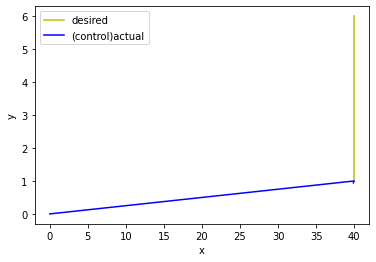

In [38]:
plt.show()
plt.plot(arr1[:,0],arr1[:,1],'y')
plt.plot(arr3131[:,0],arr3131[:,1],'b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(["desired", "(control)actual"], loc ="upper left")

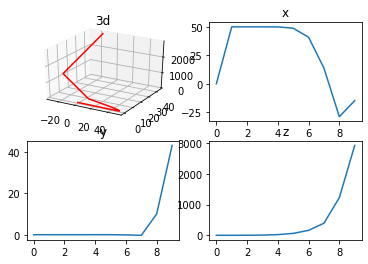

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(2,2,1,projection='3d')
X=[[s[0] for s in arr3131 ],[s[1] for s in arr3131 ],[s[2] for s in arr3131 ]]
ax.plot3D(X[0],X[1],X[2],'r')
ax.set_title("3d")

Title=['x','y','z']
t=[s for s in range(len(X[0]))]
for i in range(3):
  ax=fig.add_subplot(2,2,i+2)
  ax.plot(t,X[i])
  ax.set_title(Title[i])


plt.show()

Multivariable control

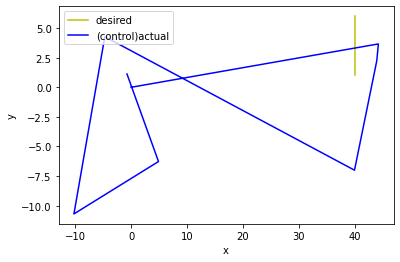

In [45]:
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import math
import numpy as np
import matplotlib.pyplot as plt
'''def model(z,t):
  dq1dt=sym.diff(q1)
  dq2dt=sym.diff(q2)
  dzdt=sym.diff(d4)
  dq1ddt=r[0]
  dq2ddt=r[1]
  dzddt=r[2]
  dzdt=[dq1dt,dq2dt,dzdt,dq1ddt,dq2ddt,dzddt]
  return dzdt

z0 = [0,0]
t=np.linspace(0,5)
z=odeint(model,z0,t)'''
E1=[]
E2=[]
E3=[]
T=[]
Q1=arr2[:,0]
Q2=arr2[:,1]
D4=arr2[:,2]
Q1ddotd=np.array([0, 0, 0, 0.0358215290870788, 0.0654788227547772,0.0693626090443080, 0.0389425507384284, 0.150917162122362,0.0307062094949028, -7.88169758329245e-18])
Q2ddotd=np.array([0, 0, 0, -0.0586206785486850, -0.108935723448079,-0.112827640080910, -0.0581157271986030, -0.278174186647171,-0.0487803117815569, 1.24464477104088e-17])
Q1dotd=np.array([0,0, 0, 0.0358215290870788, 0.0654788227547772,0.0693626090443080, 0.0389425507384284, 0.150917162122362,0.0307062094949028, -7.88169758329245e-18])
Q2dotd=np.array([0,0, 0, -0.0586206785486850, -0.108935723448079,-0.112827640080910, -0.0581157271986030, -0.278174186647171,-0.0487803117815569, 1.24464477104088e-17])
D4ddotd=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
D4dotd=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


def Model(t, y):

  KP1=1
  KI1=0
  KD1=0.5
  KP2=0.1
  KI2=0
  KD2=0.2
  KP3=0.2
  KI3=0
  KD3=0.1
  q1=y[0]
  q2=y[1]
  d4=y[2]
  q1dot=y[3]
  q2dot=y[4]
  d4dot=y[5]
  dq1dt=q1dot
  dq2dt=q2dot
  dzdt=d4dot
    
  T.append(t)
   
  n=round(t)
  if(t<=n+1):
    e1=(Q1[n-1]-q1)
    e2=(Q2[n-1]-q2)
    e3=(D4[n-1]-d4)
  else:
    n=n+1
    e1=(Q1[n]-q1)
    e2=(Q2[n]-q2)
    e3=(D4[n]-d4)
   
  E1.append(e1)
  E2.append(e2)
  E3.append(e3)
  
  s1=0
  s2=0
  s3=0
  s11=0
  s22=0
  s33=0

  if(t>2):
      for i in range(7):
          s1=s1+ (E1[-(1+i)])*(T[-(1+i)]-T[-(2+i)])
          s2=s2+ (E2[-(1+i)])*(T[-(1+i)]-T[-(2+i)])
          s3=s3+ (E3[-(1+i)])*(T[-(1+i)]-T[-(2+i)])
    #Differentiator part
  if(t>2 and (T[-(1+n)]-T[-(2+n)])>0):
      s11=(E1[-(1+n)]-E1[-(2+n)])/(T[-(1+n)]-T[-(2+n)])
      s22=(E2[-(1+n)]-E2[-(2+n)])/(T[-(1+n)]-T[-(2+n)])
      s33=(E3[-(1+n)]-E3[-(2+n)])/(T[-(1+n)]-T[-(2+n)])
  #Multivariable controller
  a1=Q1ddotd[n]+KP1*(Q1[n]-q1)+KD1*(Q1dotd[n]-q1dot)
  a2=Q2ddotd[n]+KP2*(Q2[n]-q2)+KD2*(Q2dotd[n]-q2dot)
  a3=D4ddotd[n]+KP3*(D4[n]-d4)+KD3*(D4dotd[n]-d4dot)
  imp=0
  if n>6 and n<=7:
    imp=1000;

  Td1=2812.5*q2dot*(2*q1dot + q2dot)*math.sin(q2)
  Td2=-2812.5*q1dot**2*math.sin(q2)
  Fd=- 29.4
  T1=a1*(5625.0*math.cos(q2) + 8437.5) + a2*(2812.5*math.cos(q2) + 3593.75)+Td1+imp*0
    #print(T1)
  T2=a1*(2812.5*math.cos(q2) + 3593.75) + 3593.75*a2+Td2+imp*0
  F=3*a3+Fd+imp*0


  

    
    #dq1ddt=(360*q1dot*q2dot*np.sin(q2)+360*q2dot*(q1dot+q2dot)*np.sin(q2)-(-6*q1dot**2*np.sin(q2)+3)*(72*np.cos(q2)+60)+240)/(432*np.cos(q2)**2-540)
  dq1ddt=(-(T2 - 2812.5*q1dot**2*math.sin(q2))*(15820312.5*math.cos(q2)**2 + 43945312.5*math.cos(q2) + 30322265.625) + (T1 + 2812.5*q1dot*q2dot*math.sin(q2) + 2812.5*q2dot*(q1dot + q2dot)*math.sin(q2))*(-9.31322574615479e-10*math.cos(q2)**2 + 20214843.75*math.cos(q2) + 30322265.625))/(44494628906.25*math.cos(q2)**3 + 66741943359.375*math.cos(q2)**2 - 97915649414.0625*math.cos(q2) - 146873474121.094)
    #dq2ddt=((-6*q1dot**2*np.sin(q2)+3)*(12*np.cos(q2)+14)-(6*np.cos(q2)+5)*(6*q1dot*q2dot*np.sin(q2)+6*q2dot*(q1dot+q2dot)*np.sin(q2)+4))/(36*np.cos(q2)**2-45)
  dq2ddt=((T2 - 2812.5*q1dot**2*math.sin(q2))*(5625.0*math.cos(q2) + 8437.5) - (2812.5*math.cos(q2) + 3593.75)*(T1 + 2812.5*q1dot*q2dot*math.sin(q2) + 2812.5*q2dot*(q1dot + q2dot)*math.sin(q2)))/(7910156.25*math.cos(q2)**2 - 17407226.5625)
  dzddt= 9.8- 1/3*F
    
  dydt = [dq1dt,dq2dt,dzdt,dq1ddt,dq2ddt,dzddt]
  return dydt



initstate = np.array([Q1[0],Q2[0],D4[0],0,0,0]) # initial states
timestep = 1

time=np.linspace(0,9,9) # define the time for which we want to solve


# solve the ODE. solve_ivp is the most recent version of the solver. Check docs for more information on how to use.
solution = solve_ivp(Model,[0, time[-1]], initstate, t_eval= time) 
Q1n=solution.y[0]
Q2n=solution.y[1]
D4n=solution.y[2]
Q1DOT=solution.y[3]
Q2DOT=solution.y[4]
D4DOT=solution.y[5]

sym.init_printing()
q1, q2, q3,q1dot,q2dot,q3dot,q1ddot,q2ddot,q3ddot,T1,T2,F,mG,l1,l2,l3 = sym.symbols('q1 q2 q3 q1dot q2dot d4dot q1ddot q2ddot d4ddot T1 T2 F mG l1 l2 l3')

A1=sym.Matrix([[sym.cos(q1),-sym.sin(q1),0,l1*sym.cos(q1)],[sym.sin(q1),sym.cos(q1),0,l1*sym.sin(q1)],[0,0,1,0],[0,0,0,1]]);

A2=sym.Matrix([[sym.cos(q2),sym.sin(q2),0,l2*sym.cos(q2)],[sym.sin(q2),-sym.cos(q2),0,l2*sym.sin(q2)],[0,0,-1,0],[0,0,0,1]]);
A3=sym.Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,l3],[0,0,0,1]]);

Q1x=sym.simplify(A1*A2*A3)
Q2x=sym.simplify(A1*A2)
Q3x=sym.simplify(A1)
#FORWARD KINEMATICS
def pathfunc12(Q1n,Q2n,D4n,arr):
  t=0
  for t in range (9):
    FA=Q1x.subs({l1:25,l2:25,q1:Q1n[t],q2:Q2n[t],l3:D4n[t]})
    rowq=np.transpose(FA[:,3])
  
    arr = np.vstack([arr,rowq])

  return arr



arr313 = np.array([[0,0,0,0]])
arr3131 =np.delete(pathfunc12(Q1n,Q2n,D4n,arr313),3,1)
def pathfunc13(Q1n,Q2n,D4n,arr):
  t=0
  for t in range (9):
    FA=Q2x.subs({l1:25,l2:25,q1:Q1n[t],q2:Q2n[t],l3:D4n[t]})
    rowq=np.transpose(FA[:,3])
  
    arr = np.vstack([arr,rowq])

  return arr

arr3132 =np.delete(pathfunc13(Q1n,Q2n,D4n,arr313),3,1)
def pathfunc14(Q1n,Q2n,D4n,arr):
  t=0
  for t in range (9):
    FA=Q3x.subs({l1:25,l2:25,q1:Q1n[t],q2:Q2n[t],l3:D4n[t]})
    rowq=np.transpose(FA[:,3])
  
    arr = np.vstack([arr,rowq])

  return arr

arr3134 =np.delete(pathfunc14(Q1n,Q2n,D4n,arr313),3,1)
#END EFFECTOR PLOT
plt.show()
plt.plot(arr1[:,0],arr1[:,1],'y')
plt.plot(arr3131[:,0],arr3131[:,1],'b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(["desired", "(control)actual"], loc ="upper left")



**with length change above**

**without length change below**

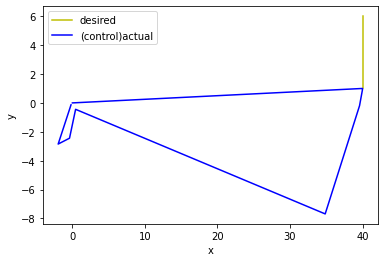

In [40]:
plt.show()
plt.plot(arr1[:,0],arr1[:,1],'y')
plt.plot(arr3131[:,0],arr3131[:,1],'b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(["desired", "(control)actual"], loc ="upper left")

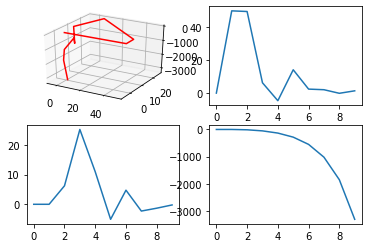

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(2,2,1,projection='3d')
X=[[s[0] for s in arr3131 ],[s[1] for s in arr3131 ],[s[2] for s in arr3131 ]]
ax.plot3D(X[0],X[1],X[2],'r')

t=[s for s in range(len(X[0]))]
for i in range(3):
  ax=fig.add_subplot(2,2,i+2)
  ax.plot(t,X[i])


plt.show()

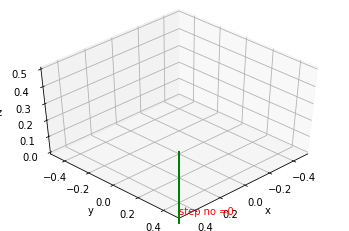

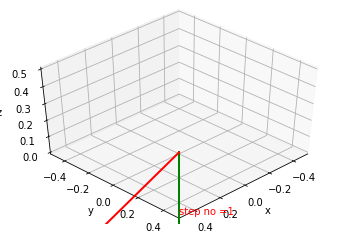

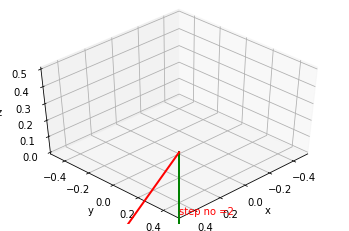

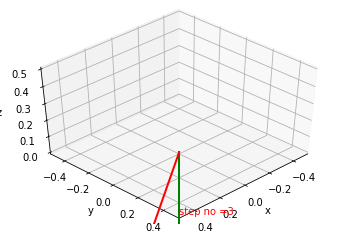

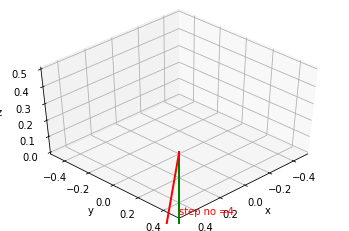

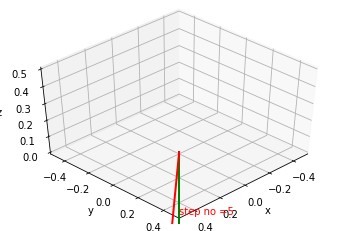

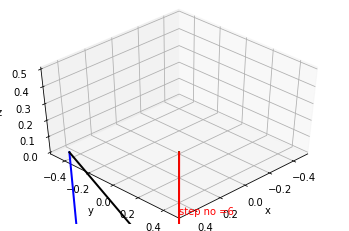

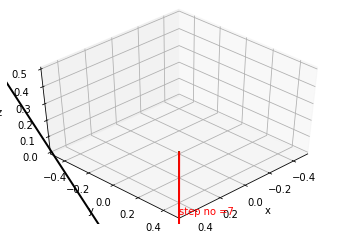

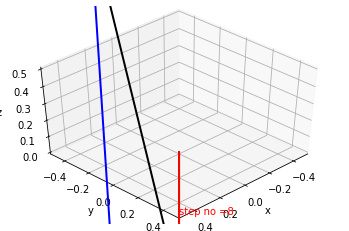

In [ ]:
def plotrobotscara(ox,oy,oz):
   # plot in 3D 3 DOF robot from DH param. base link added

  link0x = [0,0]
  link0y = [0,0]
  link0z = [0,25]
  link1x = [ox[0],ox[1]]
  link1y = [oy[0],oy[1]]
  link1z = [oz[0],oz[1]]
  link2x = [ox[1],ox[2]]
  link2y = [oy[1],oy[2]]
  link2z = [oz[1],oz[2]]
  link3x = [ox[2],ox[3]]
  link3y = [oy[2],oy[3]]
  link3z = [oz[2],oz[3]]
  ax = plt.axes(projection='3d')
  ax.set_zlabel('z')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  elev = 45
  azim = 45
  ax.view_init(elev, azim)
  ax.set_xlim(-0.5, 0.5)
  ax.set_ylim(-0.5, 0.5)
  ax.set_zlim(0, 0.5)
 #print('verification of endpoint by FK', ox[3], oy[3], oz[3])
  v = ax.plot3D(link0x, link0y, link0z, '-g',label='base', linewidth=2) #base link
  a = ax.plot3D(link1x, link1y, link1z, '-r',label='link1', linewidth=2)
  b = ax.plot3D(link2x, link2y, link2z, '-b',label='link2', linewidth=2)
  c = ax.plot3D(link3x, link3y, link3z, '-k',label='link3', linewidth=2)
  return ax
# Animate in 3D
for i in range(9):
  x1=arr3131[i][0]
  x2=arr3132[i][0]
  x3=arr3134[i][0]
  y1=arr3131[i][1]
  y2=arr3132[i][1]
  y3=arr3134[i][0]
  z1=arr3131[i][2]
  z2=arr3132[i][2]
  z3=arr3134[i][0]
  ox=[0,x1,x2,x3]
  oy=[0,y1,y2,y3]
  oz=[0,z1,z2,z3]
  ax = plotrobotscara(ox,oy,oz)
  X=[[s[0] for s in arr1 ],[s[1] for s in arr1 ],[s[2] for s in arr1 ]]
  ax.plot3D(X[0],X[1],X[2],'-m')
  plt.draw()
  ax.text(0.5, 0.5, 0, 'step no ='+str(i), color='red')
  plt.pause(0.001)

In [ ]:
def plotrobotscara(ox,oy,oz):
   # plot in 3D 3 DOF robot from DH param. base link added

  link0x = [0,0]
  link0y = [0,0]
  link0z = [0,25]
  link1x = [ox[0],ox[1]]
  link1y = [oy[0],oy[1]]
  link1z = [oz[0],oz[1]]
  link2x = [ox[1],ox[2]]
  link2y = [oy[1],oy[2]]
  link2z = [oz[1],oz[2]]
  link3x = [ox[2],ox[3]]
  link3y = [oy[2],oy[3]]
  link3z = [oz[2],oz[3]]
  ax = plt.axes(projection='3d')
  ax.set_zlabel('z')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  elev = 45
  azim = 45
  ax.view_init(elev, azim)
  ax.set_xlim(-0.5, 0.5)
  ax.set_ylim(-0.5, 0.5)
  ax.set_zlim(0, 0.5)
 #print('verification of endpoint by FK', ox[3], oy[3], oz[3])
  v = ax.plot3D(link0x, link0y, link0z, '-g',label='base', linewidth=2) #base link
  a = ax.plot3D(link1x, link1y, link1z, '-r',label='link1', linewidth=2)
  b = ax.plot3D(link2x, link2y, link2z, '-b',label='link2', linewidth=2)
  c = ax.plot3D(link3x, link3y, link3z, '-k',label='link3', linewidth=2)
  return ax
# Animate in 3D
for i in range(9):
  x1=arr3131[i][0]
  x2=arr3132[i][0]
  x3=arr3134[i][0]
  y1=arr3131[i][1]
  y2=arr3132[i][1]
  y3=arr3134[i][0]
  z1=arr3131[i][2]
  z2=arr3132[i][2]
  z3=arr3134[i][0]
  ox=[0,x1,x2,x3]
  oy=[0,y1,y2,y3]
  oz=[0,z1,z2,z3]
  ax = plotrobotscara(ox,oy,oz)
  X=[[s[0] for s in arr1 ],[s[1] for s in arr1 ],[s[2] for s in arr1 ]]
  ax.plot3D(X[0],X[1],X[2],'-m')
  plt.draw()
  ax.text(0.5, 0.5, 0, 'step no ='+str(i), color='red')
  plt.pause(0.001)

In [ ]:
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

l1=25
l2=25
m1=3
m2=3
m4=3
G=9.8

sym.init_printing()
q1, q2, d4,q1dot,q2dot,d4dot,q1ddot,q2ddot,d4ddot,T1,T2,F= sym.symbols('q1 q2 d4 q1dot q2dot d4dot q1ddot q2ddot d4ddot T1 T2 F ')
k1=sym.Matrix([q1,q2,d4])
k2=sym.Matrix([q1dot,q2dot,d4dot])
k3=sym.Matrix([q1ddot,q2ddot,d4ddot])
GQ=sym.Matrix([0,0,m4*G])
tau=sym.Matrix([T1,T2,F])
i1=m1*l1*l1/3
i2=m2*l2*l2/3
i3=m4*l2*l2/3
M=sym.Matrix([[-(l1/2)*sym.sin(q1),0,0],[(l1/2)*sym.cos(q1),0,0],[0,0,0]]);
X=M.T
N=sym.Matrix([[-l1*sym.sin(q1)-(l2/2)*sym.sin(q1+q2),-(l2/2)*sym.sin(q1+q2),0],[(l1)*sym.cos(q1)+(l2/2)*sym.cos(q1+q2),(l2/2)*sym.cos(q1+q2),0],[0,0,0]]);
Y=N.T
O=sym.Matrix([[-l1*sym.sin(q1)-(l2)*sym.sin(q1+q2),-(l2)*sym.sin(q1+q2),0],[(l1)*sym.cos(q1)+(l2)*sym.cos(q1+q2),(l2)*sym.cos(q1+q2),0],[0,0,-1]]);
Z=O.T
M1=sym.Matrix([[0,0,0],[0,0,0],[1,0,0]]);
X1=M1.T
N1=sym.Matrix([[0,0,0],[0,0,0],[1,1,0]]);
Y1=N1.T
O1=sym.Matrix([[0,0,0],[0,0,0],[1,1,0]]);
Z1=O1.T
I=sym.Matrix([[i1,0,0],[0,i2,0],[0,0,i3]])
DQ0=(sym.simplify(m1*X*M)+sym.simplify(m2*Y*N)+sym.simplify(m4*Z*O))
DQ1=(sym.simplify(i1*X1*M1)+sym.simplify(i2*Y1*N1)+sym.simplify(i3*Z1*O1))
DQ=DQ0+DQ1
no1=3
n=0;
m=0;
P=no1**2
row3, col3 = (P, no1)
CQQD= sym.Matrix([[0,0,0],[0,0,0],[0,0,0]])

#Cqqd CALCULATOR
for k in range(no1):
    for j in range(no1):
        su=0
        for i in range(no1):
            su+=(0.5*(sym.diff(DQ[k,j],k1[i]) + sym.diff(DQ[k,i],k1[j])-sym.diff(DQ[i,j],k1[k])))*k2[i]
            
        CQQD[k,j]=su
        
        
tau=sym.simplify(-(CQQD*(k2)+GQ))



	
